# - Predcition MNIST dataset using CNN:
### - CNN: Convlutional Neural Network:

- `in this project we'll use keras API to predict the mnist-10-digit classes:`

<img src="../MNIST/pictures/mnist_data_set.png"
     style="float: center; width:600px;height:500;"/>
<caption><center> <u><b> Figure 1 </u></b>: MNIST 10 classes <br> </center></caption><br>

- <b>There're are 10 classes in MNIST data set:</b>
- if picture (0) => class 0
- if picture (1) => calss 1
- if picture (2) => class 2
- if picture (3) => class 3
- if picture (4) => class 4
- if picture (5) => class 5
- if picture (6) => class 6
- if picture (7) => class 7
- if picture (8) => class 8
- if picture (9) => class 9

In [1]:
# basic libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# tensorflow:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# sklearn:
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# loading data:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# printing shapes of data:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

print("y_train shape: ", y_train.shape)
print("y_test shape: " ,y_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


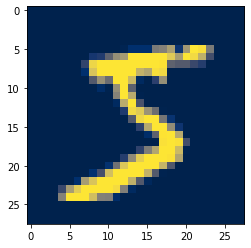

In [4]:
# showing an image of dataset as an example:
plt.imshow(x_train[0], cmap="cividis")
plt.show()

In [5]:
# normalizing:
x_train = x_train / 255
x_test = x_test /255

# one hot encoding:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# reshaping data:
# (batches, width, height, RGB color channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [6]:
# print (1):
print("number 5 is shown as: ")
print(y_train[0])

number 5 is shown as: 
5


In [7]:
# EarlyStopping:
call_back = EarlyStopping(monitor="val_loss", patience=1)

In [8]:
# creating model:
cnn_model = Sequential()
# Conv layer:
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(4,4),
                     strides=(1,1),
                     padding="valid",
                     activation="relu",
                     input_shape=(28, 28, 1)))
# MaxPooling layer:
cnn_model.add(MaxPool2D(pool_size=(2,2)))
# Flattenig out images:
cnn_model.add(Flatten())
# Dense:
cnn_model.add(Dense(128, activation="relu"))
# Dense as output:
cnn_model.add(Dense(10, activation="softmax"))

# compiling the model:
cnn_model.compile(optimizer="adam", loss="categorical_crossentropy",
                  metrics=["accuracy"])

In [9]:
# summary of the model:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [10]:
# fitting the model:
cnn_model.fit(x_train,
              y_train_cat,
              validation_data=(x_test, y_test_cat),
              batch_size=128,
              epochs=10,
              callbacks = call_back)

Epoch 1/10
469/469 [==============================] - 104s 220ms/step - loss: 0.2101 - accuracy: 0.9395 - val_loss: 0.0756 - val_accuracy: 0.9771
Epoch 2/10
469/469 [==============================] - 103s 219ms/step - loss: 0.0636 - accuracy: 0.9811 - val_loss: 0.0473 - val_accuracy: 0.9846
Epoch 3/10
469/469 [==============================] - 103s 219ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.0431 - val_accuracy: 0.9861
Epoch 4/10
469/469 [==============================] - 104s 221ms/step - loss: 0.0323 - accuracy: 0.9901 - val_loss: 0.0388 - val_accuracy: 0.9871
Epoch 5/10
469/469 [==============================] - 106s 225ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0388 - val_accuracy: 0.9865
Epoch 6/10
469/469 [==============================] - 102s 217ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0361 - val_accuracy: 0.9877
Epoch 7/10
469/469 [==============================] - 103s 220ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.0411 -

In [11]:
# saving model:
cnn_model.save("./saved_model/mnist_cnn_predictor.h5")

In [12]:
# saving meterics [loss, accuracy, val_loss, val_accuracy] into Pandas DataFrame:
metrics = pd.DataFrame(cnn_model.history.history)

In [13]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.210099,0.939467,0.075586,0.9771
1,0.063589,0.981067,0.047276,0.9846
2,0.043415,0.986983,0.043136,0.9861
3,0.032257,0.990083,0.038809,0.9871
4,0.023648,0.992667,0.038802,0.9865
5,0.019229,0.994150,0.036102,0.9877
6,0.014191,0.995767,0.041149,0.9857


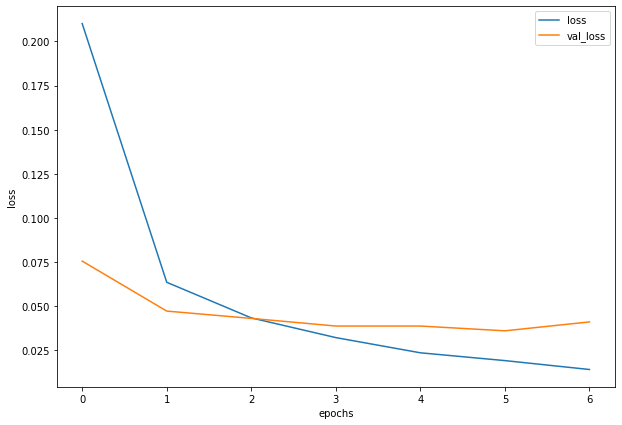

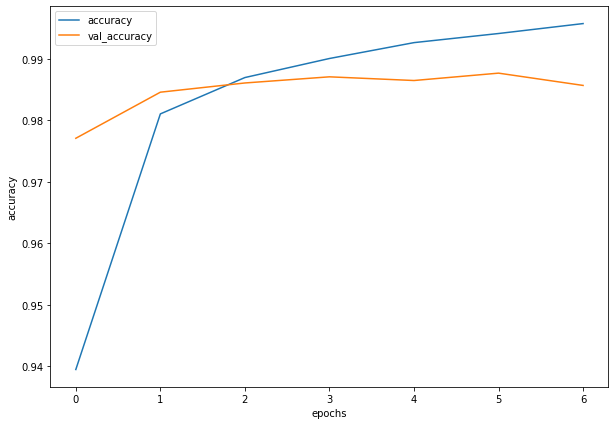

In [16]:
# plotting (loss, val_loss) ||| plotting (accuracy, val_accuracy)

# loss plot:
metrics[["loss", "val_loss"]].plot(figsize=(10,7))
plt.xlabel("epochs")
plt.ylabel("loss")

# accuracy plot:
metrics[["accuracy", "val_accuracy"]].plot(figsize=(10,7))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [17]:
# Evaluation our model:(1)
cnn_model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 8s 26ms/step - loss: 0.0411 - accuracy: 0.9857


[0.041149113327264786, 0.9857000112533569]

In [18]:
# Evaluation our model by metrics:
prediction = np.argmax(cnn_model.predict(x_test), axis=-1)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

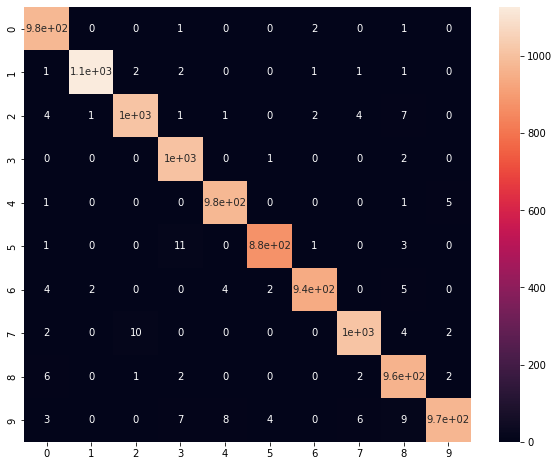

In [19]:
# confustion matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True)

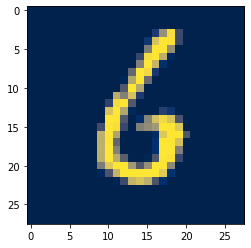

In [20]:
# testing an arbitrary image:
test_image = x_test[50]
plt.imshow(test_image, cmap="cividis")
plt.show()

In [21]:
# the final prediction on new data:
prediction_test = np.argmax(cnn_model.predict(test_image.reshape(1, 28, 28, 1)))
print("the picture's number is = ", prediction_test)

the picture's number is =  6


# The End